#Fake News Detector - Notebook 2

In this notebook we analyse the cleansed dataset to investigate which news sources produce the most fake news.

In [8]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

In [3]:
uploaded = files. upload()

Saving cleaned_dataset.csv to cleaned_dataset.csv


In [4]:
data = pd.read_csv("cleaned_dataset.csv")

In [5]:
data.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


#### (1) Investigation into the proportion of fake news to real news in the dataset

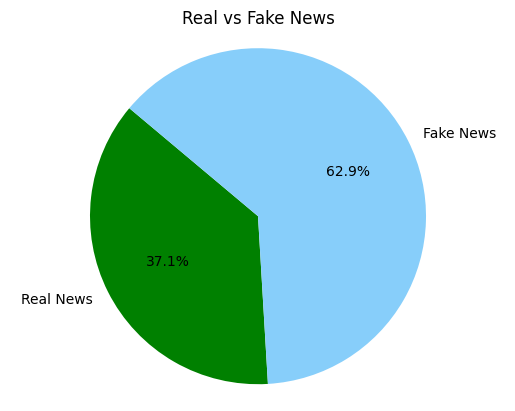

In [13]:
# Count the occurrences of real and fake news
real_count = data['label'].value_counts()["Real"]
fake_count = data['label'].value_counts()["Fake"]

# Create a pie chart
labels = ['Real News', 'Fake News']
sizes = [real_count, fake_count]
colors = ['green', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Real vs Fake News')
plt.axis('equal')
plt.show()

In [17]:
#count the number of fake and real news articles by source
source_counts = data.groupby(["site_url","label"]).size().unstack(fill_value=0)

print(source_counts)

label                   Fake  Real
site_url                          
100percentfedup.com        0    33
21stcenturywire.com       24     0
abcnews.com.co             2     0
abeldanger.net            72     0
abovetopsecret.com        53     0
...                      ...   ...
washingtonsblog.com        1     2
westernjournalism.com      2    98
whatreallyhappened.com    10     0
whydontyoutrythis.com      0     2
wnd.com                    0    51

[68 rows x 2 columns]


In [18]:
#creating new columns to measure the % of fake and real by news source

source_counts["Percentage Real (%)"] = (source_counts["Real"]/(source_counts["Real"]+source_counts["Fake"])) *100
source_counts["Percentage Fake (%)"] = (source_counts["Fake"]/(source_counts["Real"]+source_counts["Fake"])) *100

print(source_counts)

label                   Fake  Real  Percentage Real (%)  Percentage Fake (%)
site_url                                                                    
100percentfedup.com        0    33           100.000000             0.000000
21stcenturywire.com       24     0             0.000000           100.000000
abcnews.com.co             2     0             0.000000           100.000000
abeldanger.net            72     0             0.000000           100.000000
abovetopsecret.com        53     0             0.000000           100.000000
...                      ...   ...                  ...                  ...
washingtonsblog.com        1     2            66.666667            33.333333
westernjournalism.com      2    98            98.000000             2.000000
whatreallyhappened.com    10     0             0.000000           100.000000
whydontyoutrythis.com      0     2           100.000000             0.000000
wnd.com                    0    51           100.000000             0.000000

### (2) An analysis into which news sources produced the most fake news by proportion.

In [23]:
#sort sources by % of real news
sorted_sources = source_counts.sort_values(by="Percentage Real (%)", ascending=False)

print(sorted_sources.head)

<bound method NDFrame.head of label                  Fake  Real  Percentage Real (%)  Percentage Fake (%)
site_url                                                                   
100percentfedup.com       0    33                100.0                  0.0
dailywire.com             0    81                100.0                  0.0
whydontyoutrythis.com     0     2                100.0                  0.0
redstatewatcher.com       0     1                100.0                  0.0
proudemocrat.com          0     1                100.0                  0.0
...                     ...   ...                  ...                  ...
21stcenturywire.com      24     0                  0.0                100.0
infowars.com            100     0                  0.0                100.0
intrepidreport.com        1     0                  0.0                100.0
legorafi.fr              46     0                  0.0                100.0
globalresearch.ca         1     0                  0.0    

In [21]:
#print the top 10 credible news sources and round fake news % to 1dp
print("Top 10 Most Credible News Sources:")
for source, row in sorted_sources.head(10).iterrows():
    print(f"News {source}, fake news = {row['Percentage Fake (%)']:.1f}%")

Top 10 Most Credible News Sources:
News 100percentfedup.com, fake news = 0.0%
News dailywire.com, fake news = 0.0%
News whydontyoutrythis.com, fake news = 0.0%
News redstatewatcher.com, fake news = 0.0%
News proudemocrat.com, fake news = 0.0%
News presstv.com, fake news = 0.0%
News politicususa.com, fake news = 0.0%
News wnd.com, fake news = 0.0%
News addictinginfo.org, fake news = 0.0%
News returnofkings.com, fake news = 1.0%


In [24]:
##print the top 10 least news sources and round fake news % to 1dp
print("Top 10 Least Credible News Sources:")
for source, row in sorted_sources.tail(10).iterrows():
    print(f"News {source}, fake news = {row['Percentage Fake (%)']:.1f}%")

Top 10 Least Credible News Sources:
News defenddemocracy.press, fake news = 100.0%
News dennismichaellynch.com, fake news = 100.0%
News departed.co, fake news = 100.0%
News der-postillon.com, fake news = 100.0%
News galacticconnection.com, fake news = 100.0%
News 21stcenturywire.com, fake news = 100.0%
News infowars.com, fake news = 100.0%
News intrepidreport.com, fake news = 100.0%
News legorafi.fr, fake news = 100.0%
News globalresearch.ca, fake news = 100.0%
